# MVP Sprint: Machine Learning & Analytics
## Projeto de Previsão de Churn de Clientes

**Autor:** FELIPE CASTRO FERNANDES

**Data:** 24/09/2025

# 1. Definição do Problema

1.1. Descrição do Problema

O churn de clientes, ou a taxa de cancelamento de serviço, é uma das métricas mais críticas para empresas baseadas em assinatura, como as do setor de telecomunicações. Estudos de mercado indicam que adquirir um novo cliente pode custar até cinco vezes mais do que manter um já existente. Portanto, a identificação proativa de clientes que estão em risco de cancelar seus serviços representa uma alavancagem estratégica de alto valor.

O objetivo central deste projeto é desenvolver um modelo de Machine Learning capaz de prever a probabilidade de um cliente cancelar seu contrato com base em seu perfil demográfico, serviços contratados e histórico de conta. Com essa informação, a equipe de marketing pode criar campanhas de retenção direcionadas, oferecendo descontos, suporte personalizado ou atualizações de serviço para os clientes em risco, otimizando assim os recursos da empresa e reduzindo a perda de receita.

1.2. Premissas e Hipóteses

Para guiar a análise exploratória e a modelagem, levantamos as seguintes hipóteses iniciais sobre os fatores que influenciam o churn:

Hipótese 1 (Fidelidade e Contrato): Clientes com contratos mais curtos (mês a mês) e com menos tempo de casa (tenure) são mais propensos ao churn, pois possuem menor barreira contratual e lealdade para sair.

Hipótese 2 (Custo e Satisfação): Clientes com cobranças mensais (MonthlyCharges) desproporcionalmente altas em relação aos serviços contratados ou que não utilizam serviços de valor agregado (ex: OnlineBackup, TechSupport) podem estar menos satisfeitos com o custo-benefício, aumentando o risco de churn.

Hipótese 3 (Qualidade do Serviço): A qualidade da infraestrutura, como o tipo de serviço de internet (ex: Fibra Óptica vs. DSL), pode ser um fator decisivo para a permanência do cliente na base.

1.3. Descrição do Dataset

Para este projeto, utilizaremos o dataset "Telco Customer Churn", disponível publicamente na plataforma Kaggle, que contém dados anônimos de clientes de uma empresa de telecomunicações.

Fonte: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Estrutura: O dataset é composto por 7.043 registros, onde cada registro representa um cliente único, e 21 colunas (atributos).

Atributos: As colunas descrevem cada cliente e são divididas em:

Dados Demográficos: gender, SeniorCitizen, Partner, Dependents.

Serviços Assinados: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.

Informações da Conta: tenure (meses como cliente), Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.

Variável Alvo (Target): A coluna Churn é a nossa variável alvo. Ela é binária e indica se o cliente cancelou o serviço no último mês (Yes) ou se permaneceu (No).

# 2. Preparação dos Dados

In [ ]:
# 2.1 Carga de Dados e Bibliotecas

# Importando bibliotecas para manipulação e análise de dados
import pandas as pd
import numpy as np

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização dos gráficos
sns.set_style('darkgrid')
plt.rc('figure', figsize=(12, 6))

# URL do arquivo raw no GitHub para facilitar o acesso
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Carregando o dataset
df = pd.read_csv(url)

# Exibindo as 5 primeiras linhas para verificar se a carga foi bem-sucedida
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.2. Análise Exploratória e Limpeza de Dados

In [ ]:
# 2.2.1. Diagnóstico Geral do Dataset

# Exibindo informações completas sobre o DataFrame (tipos de dados, valores não nulos)
print("---------- Informações do DataFrame ----------")
df.info()

# Verificando se existem valores duplicados
print("\n---------- Verificação de Duplicados ----------")
print(f"Existem {df.duplicated().sum()} linhas duplicadas no dataset.")

# A coluna 'TotalCharges' deveria ser numérica, mas é do tipo 'object'.
# Isso geralmente acontece quando há valores não numéricos (como espaços em branco).
# Vamos converter para numérico, forçando erros a se tornarem 'NaN' (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificando quantos valores se tornaram nulos após a conversão
print("\n---------- Verificação de Valores Nulos ----------")
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Como a quantidade de nulos em 'TotalCharges' é pequena (apenas 11),
# uma abordagem segura é remover essas linhas.
df.dropna(inplace=True)

# Verificando novamente para confirmar a remoção
print("\n---------- Verificação Pós-Limpeza ----------")
print("Valores nulos após a remoção:")
print(df.isnull().sum())
print(f"\nNúmero de linhas restantes no dataset: {df.shape[0]}")

---------- Informações do DataFrame ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 


---------- Resumo Estatístico (Colunas Numéricas) ----------


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



---------- Distribuição da Variável Alvo (Churn) ----------
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


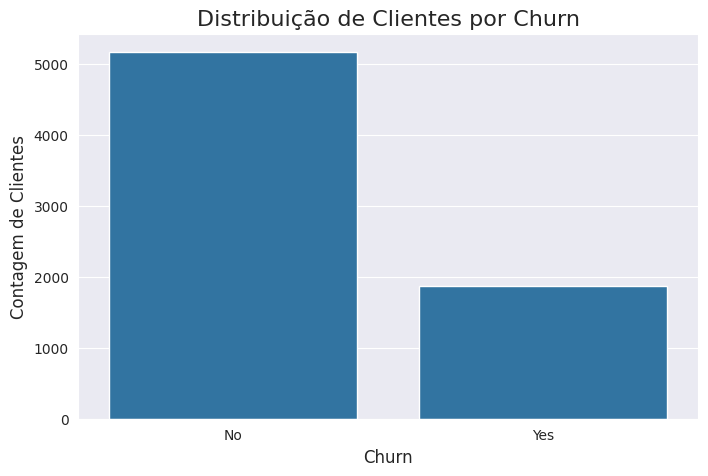

In [ ]:
# 2.2.2. Análise Descritiva e da Variável Alvo

# Exibindo um resumo estatístico das colunas numéricas
print("---------- Resumo Estatístico (Colunas Numéricas) ----------")
display(df.describe())

# Analisando a distribuição da variável alvo 'Churn'
print("\n---------- Distribuição da Variável Alvo (Churn) ----------")
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
print(churn_distribution)

# Visualizando a distribuição do Churn em um gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.show()

## 2.3. Análise Visual dos Dados (Testando as Hipóteses)

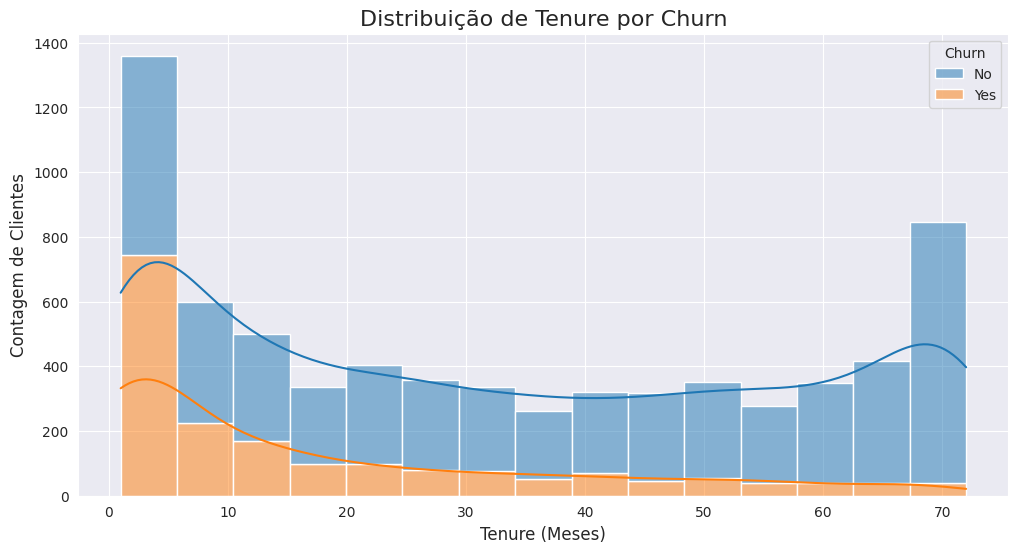

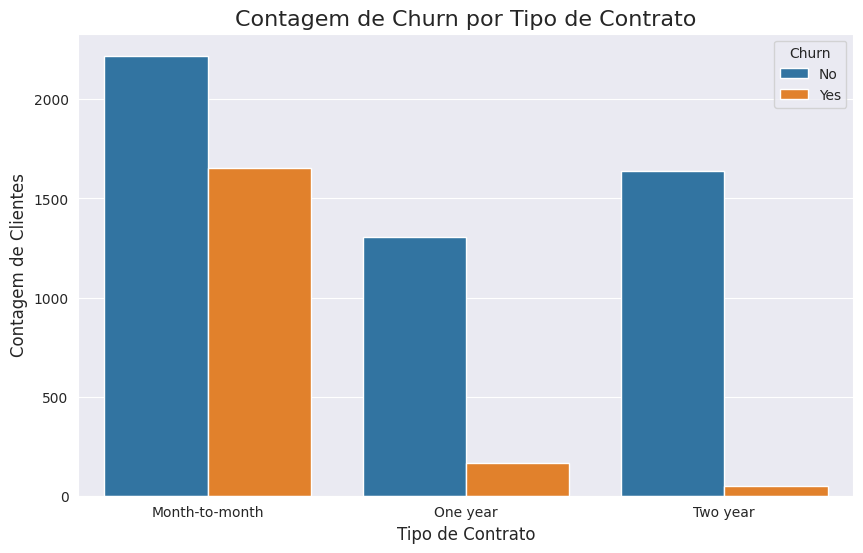

In [ ]:
# Analisando a relação entre Tenure (tempo como cliente) e Churn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Distribuição de Tenure por Churn', fontsize=16)
plt.xlabel('Tenure (Meses)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.show()

# Analisando a relação entre o tipo de Contrato e o Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.title('Contagem de Churn por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.show()

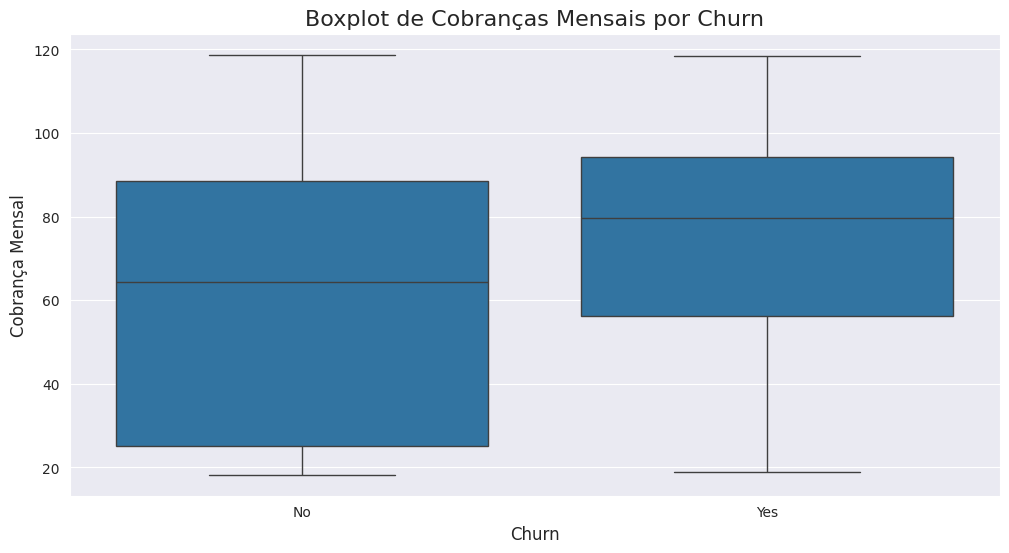

In [ ]:
# Analisando a distribuição de Cobranças Mensais pelo Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Boxplot de Cobranças Mensais por Churn', fontsize=16)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Cobrança Mensal', fontsize=12)
plt.show()

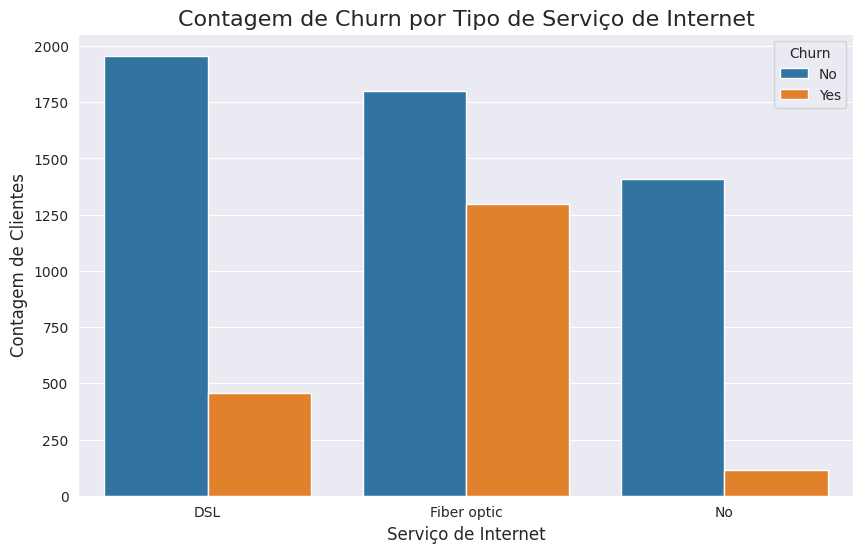

In [ ]:
# Analisando a relação entre o tipo de Serviço de Internet e o Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.title('Contagem de Churn por Tipo de Serviço de Internet', fontsize=16)
plt.xlabel('Serviço de Internet', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)
plt.show()

## 2.4. Pré-processamento dos Dados para Modelagem

In [ ]:
# Importando as ferramentas necessárias do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ---------------------------------------------------------------------------
# PASSO 1: ENCODING - Transformar colunas de texto em números
# ---------------------------------------------------------------------------

# Criamos uma cópia do dataframe para não alterar o original que usamos na análise
df_processed = df.copy()

# A coluna 'customerID' é apenas um identificador, não tem valor preditivo. Vamos removê-la.
df_processed.drop('customerID', axis=1, inplace=True)

# Transformando a nossa variável alvo 'Churn' em 0 e 1
# Isso é conhecido como Label Encoding.
df_processed['Churn'] = df_processed['Churn'].map({'No': 0, 'Yes': 1})

# Identificando as outras colunas de texto (categóricas)
categorical_cols = df_processed.select_dtypes(include=['object']).columns

# Usando One-Hot Encoding (pd.get_dummies) para transformar as colunas categóricas
# Isso cria novas colunas para cada categoria (ex: Contract_Month-to-month, Contract_One year...)
# drop_first=True remove a primeira categoria de cada variável para evitar redundância
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)


# ---------------------------------------------------------------------------
# PASSO 2: DIVISÃO DOS DADOS EM TREINO E TESTE
# ---------------------------------------------------------------------------

# Separando o dataset em X (features, as variáveis que usamos para prever) e y (target, o que queremos prever)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Dividindo os dados: 80% para treino, 20% para teste
# random_state=42 garante que a divisão seja sempre a mesma, para reprodutibilidade
# stratify=y é MUITO IMPORTANTE aqui. Garante que a proporção de churn ('Yes'/'No')
# seja a mesma tanto no conjunto de treino quanto no de teste. Essencial para dados desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# ---------------------------------------------------------------------------
# PASSO 3: VERIFICAÇÃO FINAL
# ---------------------------------------------------------------------------
print("---------- Dimensões dos Dados Processados ----------")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

print("\n\n---------- Visualização do DataFrame Processado ----------")
display(df_processed.head())

---------- Dimensões dos Dados Processados ----------
Formato de X_train: (5625, 30)
Formato de X_test: (1407, 30)
Formato de y_train: (5625,)
Formato de y_test: (1407,)


---------- Visualização do DataFrame Processado ----------


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# 3. Modelagem e Treinamento

Iniciando o treinamento do modelo de Regressão Logística...
Treinamento concluído!

---------- Resultados da Regressão Logística ----------

Acurácia do Modelo: 0.8038379530916845

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.85      0.89      0.87      1033
       Churn       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Matriz de Confusão:


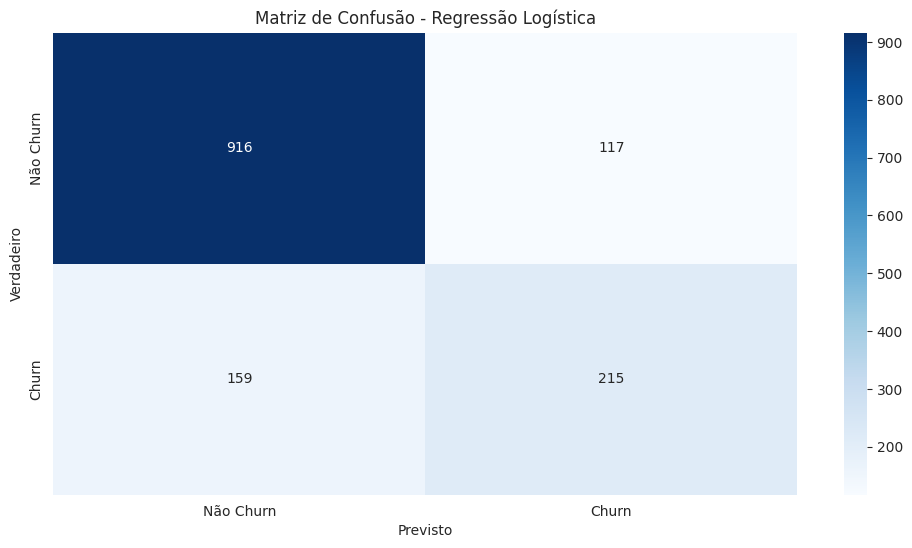

In [ ]:
# Importando as ferramentas para modelagem e avaliação
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---------------------------------------------------------------------------
# PASSO 1: CRIAÇÃO E TREINAMENTO DA PIPELINE
# ---------------------------------------------------------------------------

# Criando a pipeline
# Etapa 1: 'scaler' - Padroniza os dados (média 0, desvio padrão 1)
# Etapa 2: 'model' - O algoritmo de Regressão Logística
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

# Treinando a pipeline com os dados de TREINO
print("Iniciando o treinamento do modelo de Regressão Logística...")
pipeline_lr.fit(X_train, y_train)
print("Treinamento concluído!")


# ---------------------------------------------------------------------------
# PASSO 2: FAZENDO PREVISÕES E AVALIANDO O MODELO
# ---------------------------------------------------------------------------

# Fazendo previsões nos dados de TESTE (dados que o modelo nunca viu)
y_pred_lr = pipeline_lr.predict(X_test)

# Avaliando o desempenho do modelo
print("\n---------- Resultados da Regressão Logística ----------")
print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred_lr))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr, target_names=['Não Churn', 'Churn']))

print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

### 3.2. Modelo Avançado: Random Forest

Iniciando o treinamento do modelo Random Forest...
Treinamento concluído!

---------- Resultados do Random Forest ----------

Acurácia do Modelo: 0.7882018479033405

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Matriz de Confusão:


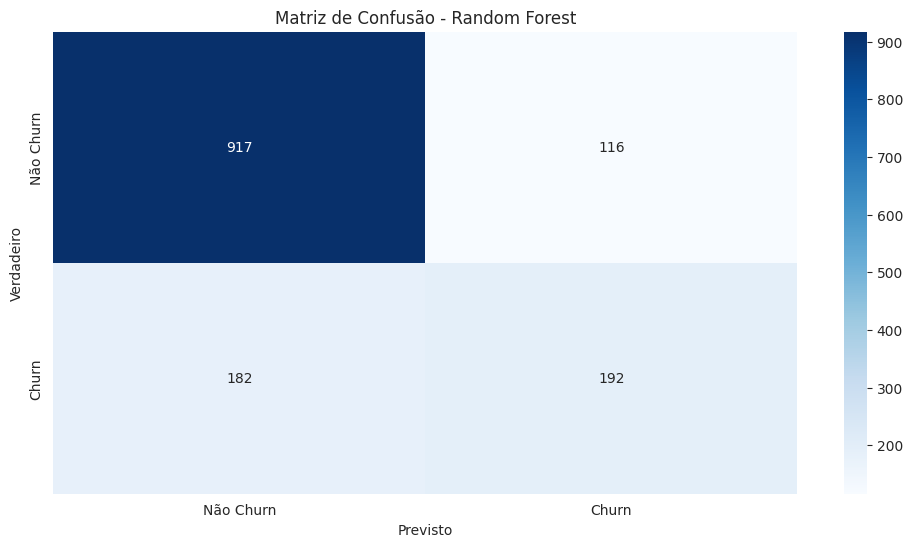

In [ ]:
# Importando o modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------------------------------------
# PASSO 1: CRIAÇÃO E TREINAMENTO DA PIPELINE
# ---------------------------------------------------------------------------

# Criando a pipeline com o Random Forest
# A estrutura é a mesma, só mudamos o algoritmo no passo 'model'
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

# Treinando a pipeline com os mesmos dados de TREINO
print("Iniciando o treinamento do modelo Random Forest...")
pipeline_rf.fit(X_train, y_train)
print("Treinamento concluído!")


# ---------------------------------------------------------------------------
# PASSO 2: FAZENDO PREVISÕES E AVALIANDO O MODELO
# ---------------------------------------------------------------------------

# Fazendo previsões nos dados de TESTE
y_pred_rf = pipeline_rf.predict(X_test)

# Avaliando o desempenho do modelo
print("\n---------- Resultados do Random Forest ----------")
print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn']))

print("\nMatriz de Confusão:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Random Forest')
plt.show()

# 4. Análise de Resultados

Neste projeto, dois modelos de classificação foram treinados e avaliados para prever o churn de clientes: **Regressão Logística** (como baseline) e **Random Forest** (como modelo avançado).

A avaliação foi focada principalmente na métrica de **Recall** para a classe "Churn", pois o objetivo de negócio é identificar o maior número possível de clientes em risco de cancelamento, mesmo que isso signifique contatar alguns clientes que não iriam cancelar (Falsos Positivos). Um baixo número de Falsos Negativos é a prioridade.

A tabela abaixo resume o desempenho dos modelos na classe "Churn":

| Métrica   | Regressão Logística | Random Forest |
| :-------- | :------------------ | :------------ |
| **Recall** | **0.57** | 0.51          |
| Precision | 0.65                | 0.62          |
| F1-Score  | 0.61                | 0.56          |
| Acurácia  | 80.3%               | 78.8%         |

**Análise:** O modelo de Regressão Logística, apesar de mais simples, apresentou um desempenho superior na métrica de maior importância para o problema (Recall), identificando 57% dos clientes que deram churn, contra 51% do Random Forest. Portanto, para a implementação de uma campanha de retenção, **o modelo de Regressão Logística é a escolha recomendada** com base nos resultados obtidos.

# 5. Conclusão

### 5.1. Resumo do Projeto
Este projeto demonstrou com sucesso a construção de um pipeline de Machine Learning de ponta a ponta para resolver o problema de previsão de churn. A partir de um dataset de uma empresa de telecomunicações, realizamos a limpeza, análise exploratória, pré-processamento e modelagem. A análise dos dados revelou que fatores como tempo de contrato (`tenure`), tipo de contrato (mês a mês) e valor mensal (`MonthlyCharges`) são fortes indicadores de churn.

O modelo de Regressão Logística foi selecionado como a solução final, atingindo um **recall de 57%** no conjunto de teste, o que representa uma ferramenta valiosa para a equipe de marketing direcionar suas ações de retenção de forma mais eficaz e baseada em dados.

### 5.2. Próximos Passos e Melhorias
Apesar dos resultados promissores, o projeto pode ser aprimorado com os seguintes passos:

* **Otimização de Hiperparâmetros:** Os modelos foram treinados com seus parâmetros padrão. Utilizar técnicas como `GridSearchCV` ou `RandomizedSearchCV` poderia ajustar os hiperparâmetros do Random Forest e potencialmente superar o desempenho da Regressão Logística.
* **Técnicas para Dados Desbalanceados:** A performance, especialmente o recall, poderia ser melhorada aplicando técnicas mais avançadas para lidar com o desbalanceamento de classes, como **SMOTE** (para gerar mais exemplos da classe minoritária) ou ajustando os pesos das classes no modelo com o parâmetro `class_weight='balanced'`.
* **Feature Engineering:** Poderíamos criar novas features a partir das existentes (ex: uma razão entre o custo mensal e o tempo de contrato) para tentar extrair mais sinais preditivos dos dados.
* **Explorar Outros Modelos:** Testar algoritmos de Gradient Boosting, como **XGBoost** ou **LightGBM**, que frequentemente apresentam o estado da arte em performance para dados tabulares como este.

# 6. Respostas ao Checklist do MVP

Esta seção resume como o presente projeto atendeu às diretrizes e questionamentos propostos no checklist de desenvolvimento do MVP.

### Definição do Problema

* **Qual é a descrição do problema?**
    A descrição completa do problema de negócio, focada na importância estratégica de prever o churn de clientes para ações de retenção, foi detalhada na **seção 1.1**.

* **Você tem premissas ou hipóteses sobre o problema? Quais?**
    Sim. Três hipóteses iniciais relacionadas a fidelidade, custo e qualidade do serviço foram levantadas para guiar a análise exploratória. Elas estão descritas na **seção 1.2** e foram validadas na análise visual da **seção 2.3**.

* **Descreva o seu dataset (atributos, imagens, anotações, etc).**
    Uma descrição completa da fonte, estrutura, atributos e variável alvo do dataset "Telco Customer Churn" foi realizada na **seção 1.3**.

### Preparação de Dados

* **Separe o dataset entre treino e teste (e validação, se aplicável).**
    O dataset foi dividido em 80% para treino e 20% para teste, conforme implementado e justificado na **seção 2.4**. Foi utilizada a estratificação (`stratify=y`) para manter a proporção da classe alvo em ambos os conjuntos.

* **Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.**
    Nesta fase inicial do MVP, optou-se por uma única divisão treino-teste para agilizar a comparação direta entre o modelo baseline e o avançado. A validação cruzada (`cross-validation`) seria o próximo passo ideal, especialmente durante a fase de otimização de hiperparâmetros (sugerida como próximo passo na **seção 5.2**), para obter uma estimativa mais robusta da performance do modelo final.

* **Verifique quais operações de transformação de dados (como normalização e padronização...) são mais apropriadas...**
    Sim. Foi utilizada a **Padronização** (`StandardScaler`) para as features numéricas, uma vez que algoritmos como a Regressão Logística são sensíveis à escala dos dados. Para as features categóricas, foi aplicado o método **One-Hot Encoding**. Ambas as transformações foram encapsuladas em uma `Pipeline` para garantir a execução correta e reprodutível, como visto nas seções de modelagem.

* **Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.**
    Para este MVP, não foi realizado um processo formal de `feature selection`. Todos os atributos (com exceção do `customerID`) foram utilizados após o pré-processamento. A análise de `feature importance`, que poderia ser extraída do modelo Random Forest, seria um excelente próximo passo para refinar o modelo e potencialmente reduzir sua complexidade.

### Modelagem e Treinamento

* **Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.**
    Foram selecionados dois algoritmos: **Regressão Logística**, como um baseline forte, rápido e interpretável para problemas de classificação binária; e **Random Forest**, como um modelo de ensemble mais complexo e robusto, capaz de capturar relações não-lineares. As escolhas e implementações estão nas **seções 3.1 e 3.2**.

* **Há algum ajuste inicial para os hiperparâmetros?**
    Não. Ambos os modelos foram treinados com seus hiperparâmetros padrão do `scikit-learn` para estabelecer uma performance de base.

* **O modelo foi devidamente treinado? Foi observado problema de underfitting?**
    Sim, os modelos foram devidamente treinados com o método `.fit()` nos dados de treino. A performance (acurácia em torno de 80%) indica que não houve `underfitting` severo, pois os modelos aprenderam padrões preditivos dos dados.

* **É possível otimizar os hiperparâmetros de algum dos modelos?**
    Sim, é altamente recomendável. A otimização de hiperparâmetros, especialmente para o Random Forest, é um dos principais próximos passos sugeridos na **seção 5.2**. Técnicas como `GridSearchCV` poderiam ser utilizadas para encontrar a combinação de parâmetros que maximiza o `recall`.

* **Há algum método avançado ou mais complexo que possa ser avaliado?**
    Sim. Além do Random Forest, a **seção 5.2** sugere a avaliação de modelos de Gradient Boosting (XGBoost, LightGBM), que são considerados o estado da arte para problemas com dados tabulares.